In [24]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv("dataset/train.csv")

/home/raavan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (294,299,300,302,307,313,315,365,367,369) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
train_x = data.iloc[:, :-1]

train_y = data.iloc[:,-1].values

In [6]:
train_x.head()

,UCIC_ID,NO_OF_Accs,HNW_CATEGORY,vintage,EMAIL_UNSUBSCRIBE,OCCUP_ALL_NEW,city,dependents,zip,FINAL_WORTH_prev1,...,Query_Logged_PrevQ1,Query_Resolved_PrevQ1,Complaint_Logged_PrevQ1,Complaint_Resolved_PrevQ1,NO_OF_CHEQUE_BOUNCE_V1,Percent_Change_in_Credits,Percent_Change_in_FT_Bank,Percent_Change_in_FT_outside,Percent_Change_in_Self_Txn,Percent_Change_in_Big_Expenses
0,170114,1,2_Preferred,1947,NaN,HOUSEWIFE,BANGALORE,0.0,562114.0,HIGH,...,NaN,NaN,NaN,NaN,NaN,-94.757314,NaN,0.0,NaN,NaN
1,488013,1,1_Imperia,3082,NaN,SALARIED,MUMBAI,0.0,400015.0,HIGH,...,NaN,NaN,NaN,NaN,NaN,160.024566,NaN,0.0,NaN,0.0
2,435239,1,2_Preferred,572,NaN,SELF_EMPLOYED,HILI,NaN,733126.0,HIGH,...,NaN,NaN,NaN,NaN,NaN,273.771918,NaN,10.0,NaN,NaN
3,331646,1,3_Classic,773,NaN,SELF_EMPLOYED,NAMAKKAL,0.0,637410.0,HIGH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,226900,1,2_Preferred,1627,NaN,HOUSEWIFE,MUMBAI,0.0,400053.0,HIGH,...,NaN,NaN,NaN,NaN,NaN,399.997265,NaN,7.0,NaN,NaN


In [7]:
train_y

array([0, 0, 1, ..., 0, 0, 1])

In [8]:
train_x=train_x.dropna(axis=1,how='all')
train_x=train_x.dropna(axis=0,how='all')
train_x.drop('city',axis=1,inplace=True)
train_x.drop('zip',axis=1,inplace=True)

In [9]:
frac = len(train_x) * 0.7
train_x=train_x.dropna(thresh=frac, axis=1)
train_x.shape

(300000, 213)

In [10]:
null_columns=train_x.columns[train_x.isnull().any()]
train_x[null_columns].isnull().sum()

OCCUP_ALL_NEW               96
dependents               26382
FINAL_WORTH_prev1          186
ENGAGEMENT_TAG_prev1       186
Recency_of_CR_TXN        33194
Recency_of_DR_TXN        23252
Recency_of_BRANCH_TXN    18368
Recency_of_Activity        477
dtype: int64

In [11]:
obj=train_x.select_dtypes(include=[object]).columns
obj

lis=[]
for x in obj:
    lis.append(train_x.columns.get_loc(x))
lis   

[2, 4, 6, 7, 176, 188, 189, 190, 191, 193, 195]

In [12]:
for col in train_x.columns.values:
    if train_x[col].dtypes != 'object':
        train_x[col].fillna(train_x[col].mean(), inplace=True)

In [13]:
for col in train_x.columns.values:
    if train_x[col].dtypes == 'object':
        train_x[col].fillna(train_x[col].value_counts().index[0], inplace=True)

In [14]:
null_columns=train_x.columns[train_x.isnull().any()]
train_x[null_columns].isnull().sum()

Series([], dtype: float64)

In [15]:
labelencoder = LabelEncoder()

for col in train_x.columns.values:
    if train_x[col].dtypes == 'object':
        train_x[col] = labelencoder.fit_transform(train_x[col])


In [16]:
onehotencoder = OneHotEncoder(categorical_features=lis)
train_x = onehotencoder.fit_transform(train_x).toarray()

In [17]:
sc_X = StandardScaler()
train_x = sc_X.fit_transform(train_x)

In [22]:
train_x

array([[-0.38297603,  0.97011955, -0.7450051 , ..., -0.00763294,
        -0.00299697, -0.00479285],
       [ 2.61112945, -1.03080079, -0.7450051 , ..., -0.00763518,
        -0.00299537, -0.00480853],
       [-0.38297603,  0.97011955, -0.7450051 , ..., -0.0076297 ,
        -0.00300571, -0.0047885 ],
       ..., 
       [-0.38297603,  0.97011955, -0.7450051 , ..., -0.0075623 ,
        -0.00299536, -0.0048018 ],
       [-0.38297603,  0.97011955, -0.7450051 , ..., -0.00763191,
        -0.00299521, -0.004802  ],
       [-0.38297603, -1.03080079,  1.34227268, ..., -0.0076552 ,
        -0.00298662, -0.00481975]])

In [18]:
from sklearn.decomposition import PCA
pca = PCA()

In [19]:
pca = pca.fit(train_x)

In [22]:
variance = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

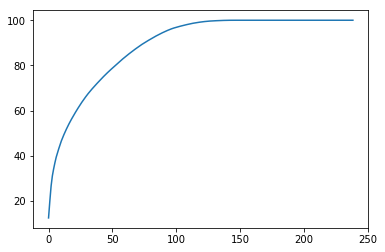

In [25]:
plt.plot(variance)

In [26]:
pca = PCA(n_components=100)

In [27]:
train_x_pca = pca.fit_transform(train_x)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
train_X, test_X, train_y, test_y = train_test_split(train_x_pca, train_y, test_size=0.33, random_state=42)

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
clf = DecisionTreeClassifier(min_samples_split=5)

In [33]:
clf.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [34]:
test_pred = clf.predict(test_X)

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(test_y, test_pred)

0.74091919191919187